In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib widget

In [2]:
directory = 'e:/My/Projects/LAB/DC Reference Standard DTF 20125/Docs/csv/new_10V'
extension = '.csv'
csv_data_list = []
for filename in os.listdir(directory):
    if not filename.endswith(extension):
        continue
    f = os.path.join(directory, filename)
    if os.path.isfile(f):
        csv_data_list.append(f)

In [3]:
df_all = pd.DataFrame()
for f in csv_data_list:
    tmp = pd.read_csv(f, sep=';', names = ['Date', 'Time', 't0','t1','t2','t3','t4','t5','t6','t7','text','Uref','VAC'])
    tmp['DateTime'] = pd.to_datetime( tmp['Date'] + ' ' + tmp['Time'], dayfirst = True)
    df_all = pd.concat([df_all, tmp])
df_all.sort_values(by=['DateTime'], inplace=True, na_position='first')
df_all.reset_index(inplace = True, drop=True)
badUref = df_all[df_all.DateTime == '2023-10-11 00:57:50'].Uref
nanUref = pd.to_numeric(badUref, errors = 'coerce')
nanUref

169143   NaN
Name: Uref, dtype: float64

In [4]:
df_all.loc[:, 'Uref'] = df_all.Uref.apply(lambda x: pd.to_numeric(x, errors = 'coerce'))
df_all[df_all.DateTime == '2023-10-11 00:57:50']

,Date,Time,t0,t1,t2,t3,t4,t5,t6,t7,text,Uref,VAC,DateTime
169143,11.10.2023,00:57:50,25.88,26.06,25.94,26.06,26.06,26.0,26.06,26.0,-1000.0,NaN,NaN,2023-10-11 00:57:50


<Axes: >

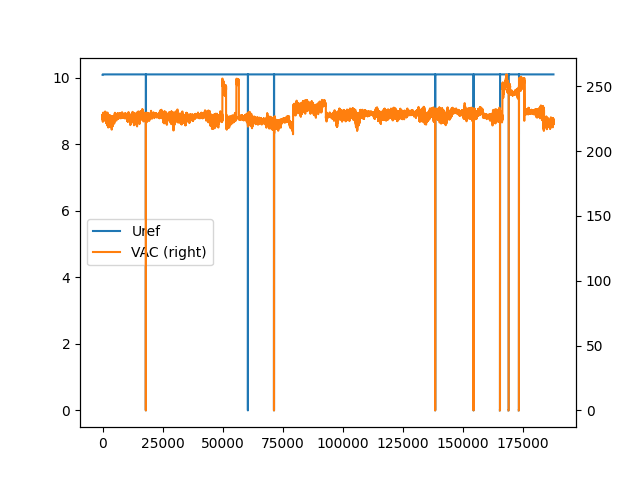

In [12]:
df_all[['Uref', 'VAC']].plot(secondary_y=['VAC'], legend=True)